Function that computes all powers

In [1]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def get_powers(num_tps,df_list_cleaned):
    plt.rcParams['figure.figsize'] = [13, 10]
    initial_offset = 2
#     color_list = ['green','teal','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon','salmon']
#     legend_list = ['','','Modem','RFE','','','','','','','','','','Display']

    battery_power = []
    total_power = []
    modem_power = []
    display_power = []
    rfe_power = []
    all_powers = pd.DataFrame(index=range(24), columns=range(num_tps))

    for tp_idx in range(num_tps):
        df_np = np.array(df_list_cleaned[tp_idx])
        df_np[:,:,0] = df_np[:,:,0] - np.tile(df_np[:,0,0],[df_np.shape[1],1]).T
        df_np[:,:,0] = df_np[:,:,0]/1e9
        sum_pwr = [0]*len(df_np[1,:,1])
#         plt.subplot(num_tps,1,tp_idx+1)
        for i in range(0,25):
            x_vals = df_np[i,:,0]
            y_vals = df_np[i,:,1]
            delta_x_vals = np.copy(x_vals)
            delta_x_vals[1:] = delta_x_vals[1:]-delta_x_vals[0:x_vals.size-1]
            delta_x_vals[0] = 0
            delta_y_vals = np.copy(y_vals)
            if (i==0) :
                delta_y_vals = 3.75*10**(-3)*(abs(y_vals[initial_offset:]))
#                 plt.plot(x_vals[initial_offset:],delta_y_vals,color = 'blue',label="Battery power consumed (mW)")
                battery_power.append(delta_y_vals)
            if (i>=1):
                delta_y_vals[1:] = delta_y_vals[1:]-delta_y_vals[0:y_vals.size-1]
                delta_y_vals[0] = 0
                avg_pow_indiv = np.mean(delta_y_vals[initial_offset:]*(4/1000))
                all_powers.iloc[i-1,tp_idx] = avg_pow_indiv
    #             print("Average Power (mW) for "+str(string_mapper[i-1])+": "+str(avg_pow_indiv)+" mW")
                sum_pwr = sum_pwr+delta_y_vals
            if(i==2):
                modem_power.append(delta_y_vals)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'green',label='Modem')    

            if(i==3):
                rfe_power.append(delta_y_vals)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'cyan',label='RFE')    

            if (i ==13):
                display_power.append(delta_y_vals)
#                 plt.plot(x_vals[initial_offset:],delta_y_vals[initial_offset:]*(4/1000),color = 'salmon',label='Display')    
#                 plt.plot([min_time,max_time],[avg_pow_indiv,avg_pow_indiv], linestyle="--", color='salmon', label = "Peak Pow: "+str(avg_pow_indiv.round(2))+ " mW")
#         print(sum_pwr)
        total_power.append(sum_pwr)
#         plt.plot(x_vals[initial_offset:],total_power[tp_idx][initial_offset:]*(4/1000),color='purple',label='Total power from OPDM')

#         plt.xlabel("Time (seconds)", fontsize=12)
#         plt.ylabel("Power (mW)", fontsize=16)
#         plt.title("Comparison of Battery consumption with total power")
#         plt.legend(fontsize=10)
#         # plt.title('Ratio vs #femto BS')
#         plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
#         plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
#         # plt.minorticks_on()

#         plt.xticks(fontsize=12)
#         plt.yticks(fontsize=14)
#         plt.ylim([0,2150])
    # print(total_power)
    airplane_battery = np.mean(battery_power[0])
    airplane_total = np.mean(total_power[0])
    pct_cell = []
    pct_battery = []
    delta_battery = []
    delta_total = []
    odpm_total = []
    delta_modem = []
    pct_p_tilda_pi = []
    disp_avg = [np.mean(display_power[0])*4/1000]
    battery_avg = [airplane_battery]
    modem_avg = [(np.mean(rfe_power[0])+np.mean(modem_power[0]))*4/1000]
    odpm_avg= [airplane_total*4/1000]
    for i in range(1,num_tps):
        pi_hat = (np.mean(rfe_power[i])+np.mean(modem_power[i]))*4/1000
        modem_avg.append(pi_hat)
        battery_avg.append(np.mean(battery_power[i]))
        pi_tilda=(np.mean(battery_power[i])-airplane_battery)
        pi = np.mean(total_power[i])*4/1000
        odpm_avg.append(pi)
        delta_battery.append(pi_tilda)
        delta_total.append((np.mean(total_power[i])-airplane_total)*4/1000)
        delta_modem.append(np.mean(modem_power[i])*4/1000)
        odpm_total.append(pi_hat)
        disp_avg.append(np.mean(display_power[i])*4/1000)
        pct_cell.append((pi_hat)/pi) #modem/total
        pct_battery.append(pi_tilda/pi_hat) #battery diff/modem
        pct_p_tilda_pi.append(pi_tilda/pi) #battery diff /total
    outputs = [delta_battery,battery_avg,modem_avg,odpm_avg,disp_avg,pct_cell,pct_battery,pct_p_tilda_pi]        
    return outputs

In [2]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialise TraceProcessor with a trace file
enable_legend = True
# col_list = ['Airplane','Standby off','Standby mint','Airplane FullB','Iperf1M_DL','Iperf1M_UL','Youtube','Wifi_iperf_UL','5G_Iperf1M_UL']
# col_list = ['Airplane','Standby off','Standby mint','Airplane FullB','Iperf1M_DL','Iperf1M_UL','Youtube','Wifi_iperf_UL','5G_Iperf1M_UL']
num_exps = 3
delta_battery = []
battery = []
modem = []
display = []
odpm_total = []
pct_cell = []
pct_battery = []
pct_p_tilda_pi = []
for exp in range(num_exps):
    df_list_cleaned = []
    tp_list= []
    print(exp)
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_airplane_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/pxl_LTE_Stnd40_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_stdby_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_stdby_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_iperf1M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_iperf5M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/ul_iperf1M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/ul_iperf5M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/ul_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_iperf1M_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    num_tps = len(tp_list)
    id_mapper = [27]+list(range(1,25))
# string_mapper = ["Battery charge","Battery capacity pct","Battery current","Battery avg current","Modem","RFE","mmWave","Display"]

    df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]
    outputs = get_powers(num_tps,df_list_cleaned)
#     print(outputs[0])
    delta_battery.append(outputs[0])
    battery.append(outputs[1])
    modem.append(outputs[2])
    odpm_total.append(outputs[3])
    display.append(outputs[4])
    pct_cell.append(outputs[-3])
    pct_battery.append(outputs[-2])
    pct_p_tilda_pi.append(outputs[-1])
#     print("Percentage of modem+rfe in total odpm across different modes : ",pct_cell)
#     print("Percentage of modem+rfe in battery power across different modes : ",pct_battery)

0
1


KeyboardInterrupt: 

Plots for different modes - Fig 1

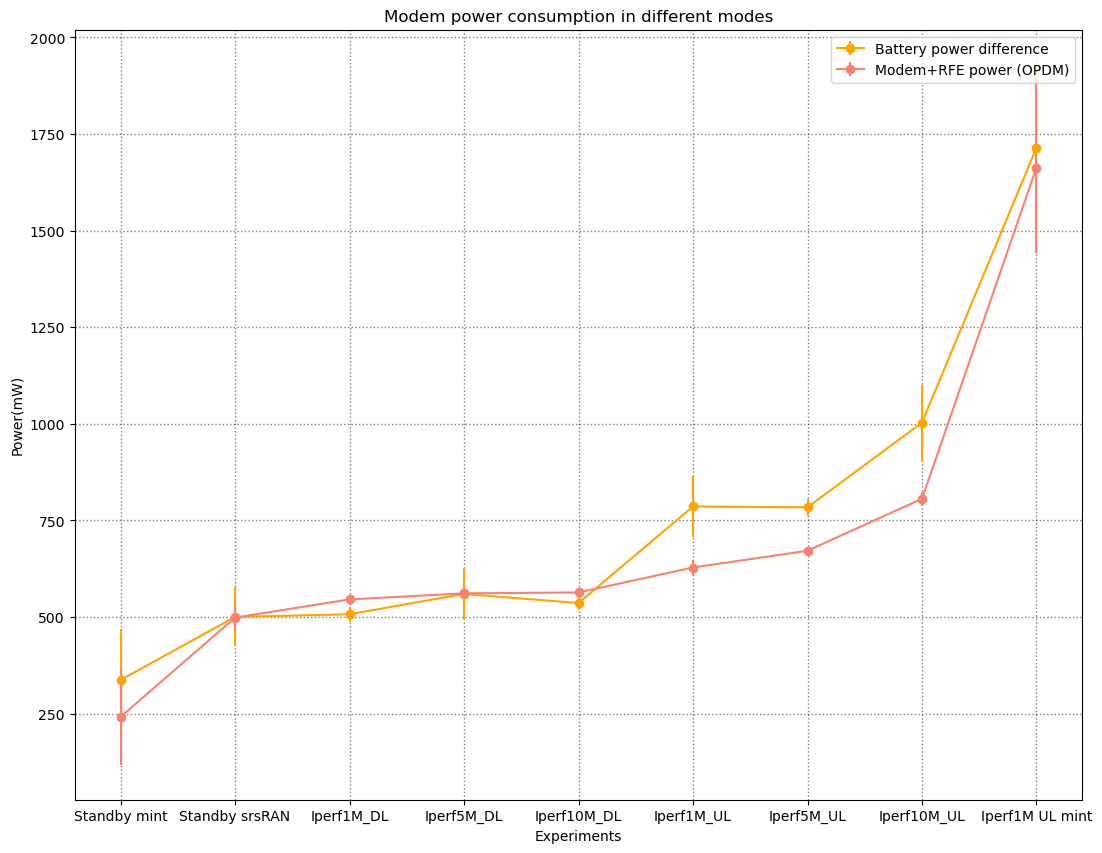

In [5]:
# col_list = ['Airplane','Standby','Standby mint','Iperf1M_DL','Iperf1M_UL','Youtube','5G_Iperf1M_UL']
# col_list = ['Airplane','Standby off','Standby mint','Airplane FullB','Iperf1M_DL','Iperf1M_UL','Youtube',
#             'Wifi_iperf_UL','5G_Iperf1M_UL','Insta Web','InstaApp']
col_list = ['Airplane','Standby mint','Standby srsRAN','Iperf1M_DL','Iperf5M_DL','Iperf10M_DL','Iperf1M_UL','Iperf5M_UL','Iperf10M_UL','Iperf1M UL mint']
# ,'Wifi Youtube','LTE Youtube','Youtube']

delta_battery_avg = np.mean(np.array(delta_battery).T,1)
battery_avg = np.mean(np.array(battery).T,1)
odpm_total_avg = np.mean(np.array(odpm_total).T,1)
modem_avg = np.mean(np.array(modem).T,1)
disp_avg = np.mean(np.array(display).T,1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = col_list[1:]
# plt.rcParams['figure.figsize'] = [13, 10]
# plt.errorbar(range(len(legend_list)),battery_avg,yerr=np.std(np.array(battery).T,1),color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
# plt.errorbar(range(len(legend_list)),odpm_total_avg,yerr=np.std(np.array(odpm_total).T,1),color='purple',linestyle='-',marker='>',label='Total power (ODPM)')
plt.errorbar(range(len(legend_list)),delta_battery_avg,yerr=np.std(np.array(delta_battery).T,1),color='orange',linestyle='-',marker='o',label =  'Battery power difference')
plt.errorbar(range(len(legend_list)),modem_avg[1:],yerr=np.std(np.array(modem).T,1)[1:],color='salmon',linestyle='-',marker='o',label = 'Modem+RFE power (OPDM)')
plt.legend()
plt.title('Modem power consumption in different modes') 
plt.xlabel('Experiments')
plt.ylabel('Power(mW)')
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.ylim([300,800])

Plots for display - Fig 2

In [33]:
# Initialise TraceProcessor with a trace file
tp_list= []
# color_list = ['red','orange','green']
# color_list.append(['red','orange','green'])
# color_list = ['blue','cyan','springgreen','lime','teal']
color_list = ['blue','cyan','teal','red','pink','salmon']
# color_list = ['blue','cyan','teal','gold','orange','bisque','red','pink','salmon']
line_list = ['-','-','-','-','-','-','-','-','-','-','-','-','-']
enable_legend = True
col_list = ['Standby off','Standby 20%','LTE Standby','Standby 40%','Standby 60%','Standby 80%','Standby 100%']
num_exps = 3
delta_battery = []
battery = []
modem = []
display = []
odpm_total = []
pct_cell = []
pct_battery = []
pct_p_tilda_pi = []
for exp in range(num_exps):
    df_list_cleaned = []
    tp_list= []
    print(exp)
#     tp_list.append(TraceProcessor(trace='../Perfetto_traces/5_4_no_charge_airplane_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_stdby_dispOff_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_Stnd20_2min_'+str(exp+1)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_Stnd40_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_Stnd60_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_Stnd80_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_stdby_dispON_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    num_tps = len(tp_list)
    id_mapper = [27]+list(range(1,25))

    df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]
    outputs = get_powers(num_tps,df_list_cleaned)
    delta_battery.append(outputs[0])
    battery.append(outputs[1])
    modem.append(outputs[2])
    odpm_total.append(outputs[3])
    display.append(outputs[4])
    pct_cell.append(outputs[-3])
    pct_battery.append(outputs[-2])
    pct_p_tilda_pi.append(outputs[-1])

0
1
2


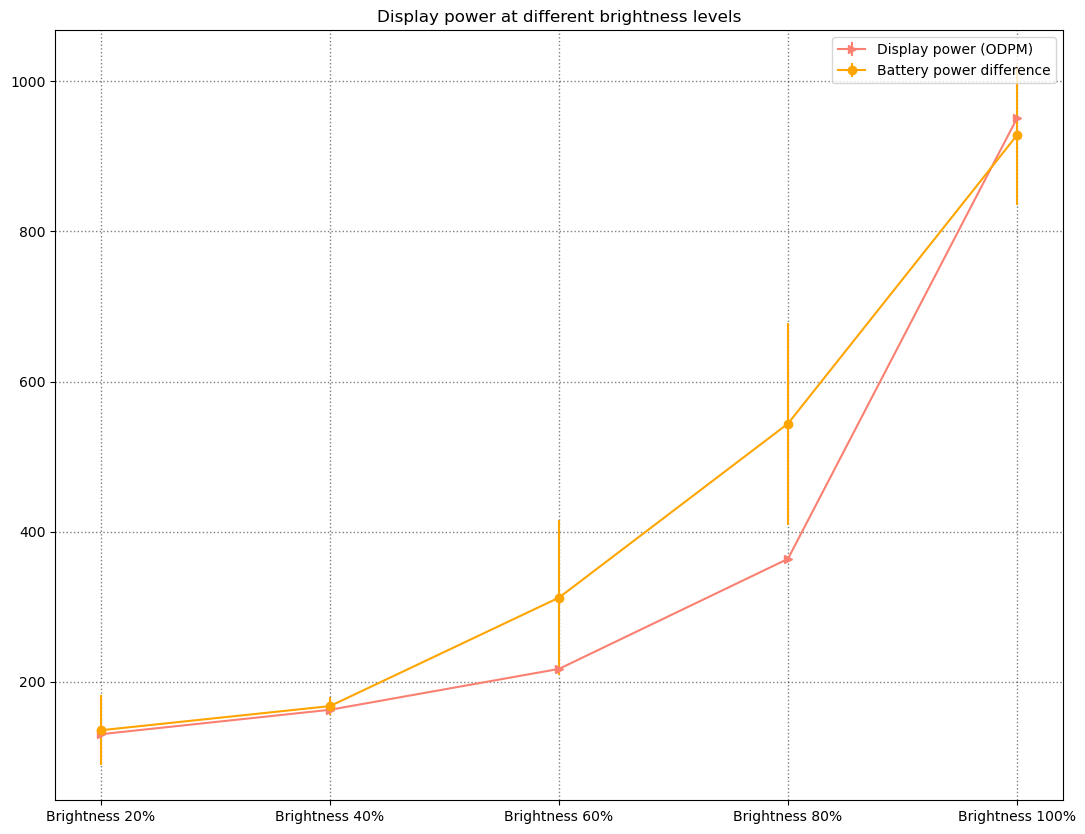

In [34]:
delta_battery_avg = np.mean(np.array(delta_battery).T,1)
battery_avg = np.mean(np.array(battery).T,1)
modem_avg = np.mean(np.array(modem).T,1)
disp_avg = np.mean(np.array(display).T,1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = ['Brightness 20%','Brightness 40%','Brightness 60%','Brightness 80%','Brightness 100%']
plt.rcParams['figure.figsize'] = [13, 10]
# plt.errorbar(range(len(legend_list)),battery_avg,yerr=np.std(np.array(battery).T,1),color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
plt.errorbar(range(len(legend_list)),disp_avg[1:],yerr=np.std(np.array(display).T,1)[1:],color='salmon',linestyle='-',marker='>',label='Display power (ODPM)')
plt.errorbar(range(len(legend_list)),delta_battery_avg,yerr=np.std(np.array(delta_battery).T,1),color='orange',linestyle='-',marker='o',label =  'Battery power difference')
plt.legend()
plt.title('Display power at different brightness levels') 
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.ylim([300,800])

In [17]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

verbose=True
num_exps = 3
delta_battery = []
battery = []
modem = []
display = []
odpm_total = []
pct_cell = []
pct_battery = []
pct_p_tilda_pi = []
for exp in range(num_exps):
    df_list_cleaned = []
    tp_list= []
#     tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_stdby_dispOff_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    print(exp)
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_airplane_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_airp_YT_50_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_wifi_YT_50_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_LTE_YT_50_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_5G_YT_50_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    num_tps = len(tp_list)
    id_mapper = [27]+list(range(1,25))
# string_mapper = ["Battery charge","Battery capacity pct","Battery current","Battery avg current","Modem","RFE","mmWave","Display"]

    df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]
    outputs = get_powers(num_tps,df_list_cleaned)
#     print(outputs[0])
    delta_battery.append(outputs[0])
    battery.append(outputs[1])
    modem.append(outputs[2])
    odpm_total.append(outputs[3])
    display.append(outputs[4])
    pct_cell.append(outputs[-3])
    pct_battery.append(outputs[-2])
    pct_p_tilda_pi.append(outputs[-1])
#     print("Percentage of modem+rfe in total odpm across different modes : ",pct_cell)
#     print("Percentage of modem+rfe in battery power across different modes : ",pct_battery)

0
1
2


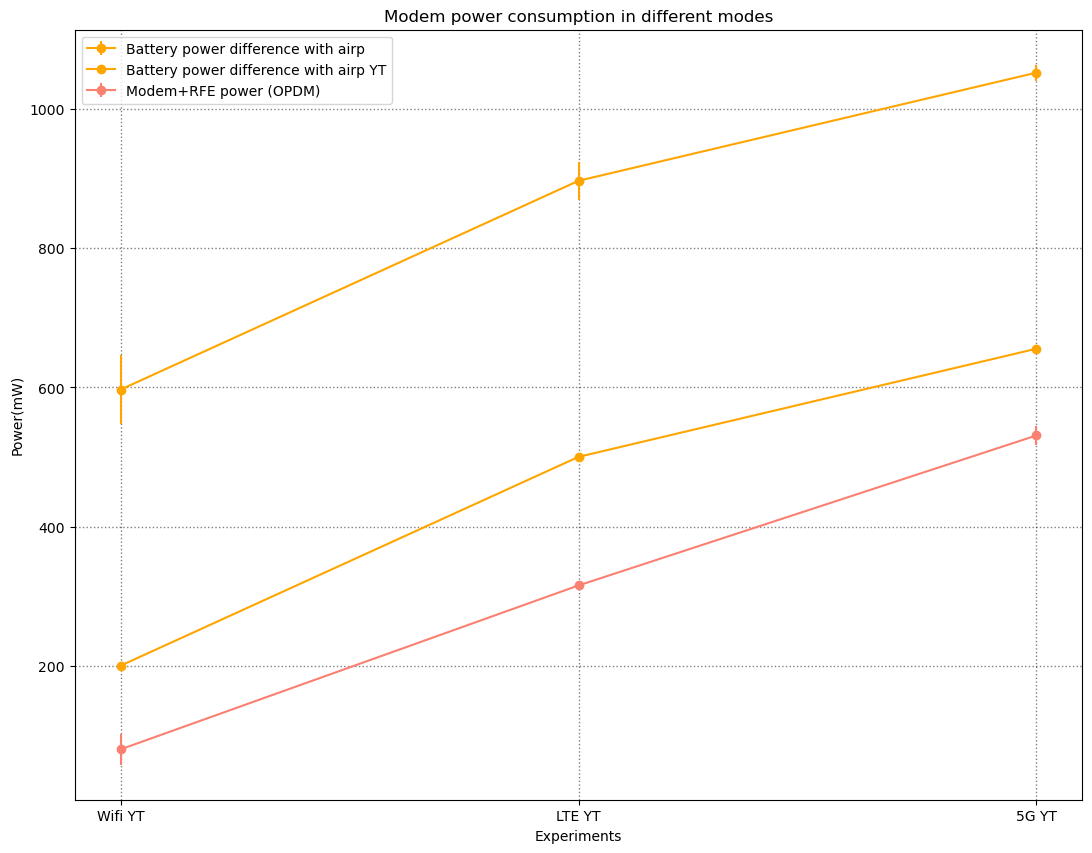

In [32]:
# col_list = ['Airplane','Standby mint','Standby srsRAN','Iperf1M_DL','Iperf5M_DL','Iperf10M_DL','Iperf1M_UL','Iperf5M_UL','Iperf10M_UL','Iperf1M UL mint']
# ,'Wifi Youtube','LTE Youtube','Youtube']
col_list = ['Airplane','Airplane YT','Wifi YT','LTE YT','5G YT']
delta_battery_avg = np.mean(np.array(delta_battery).T,1)
battery_avg = np.mean(np.array(battery).T,1)
delta2 = battery_avg[2:]-battery_avg[1]
odpm_total_avg = np.mean(np.array(odpm_total).T,1)
modem_avg = np.mean(np.array(modem).T,1)
disp_avg = np.mean(np.array(display).T,1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = col_list[2:]
# plt.rcParams['figure.figsize'] = [13, 10]
# plt.errorbar(range(len(legend_list)),battery_avg,yerr=np.std(np.array(battery).T,1),color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
# plt.errorbar(range(len(legend_list)),odpm_total_avg,yerr=np.std(np.array(odpm_total).T,1),color='purple',linestyle='-',marker='>',label='Total power (ODPM)')
plt.errorbar(range(len(legend_list)),delta_battery_avg[1:],yerr=np.std(np.array(delta_battery).T,1)[1:],color='orange',linestyle='-',marker='o',label =  'Battery power difference with airp')
plt.errorbar(range(len(legend_list)),delta2,color='orange',linestyle='-',marker='o',label =  'Battery power difference with airp YT')
# plt.errorbar(range(len(legend_list)),disp_avg[2:],yerr=np.std(np.array(display).T,1)[2:],color='salmon',linestyle='-',marker='>',label='Display power (ODPM)')
plt.errorbar(range(len(legend_list)),modem_avg[2:],yerr=np.std(np.array(modem).T,1)[2:],color='salmon',linestyle='-',marker='o',label = 'Modem+RFE power (OPDM)')
plt.legend()
plt.title('Modem power consumption in different modes') 
plt.xlabel('Experiments')
plt.ylabel('Power(mW)')
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.ylim([300,800])

In [25]:
delta2 = battery_avg[2:]-battery_avg[1]
delta2

array([200.63083159, 500.35013544, 655.59719425])

In [52]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

verbose=True
num_exps = 3
delta_battery = []
battery = []
modem = []
display = []
odpm_total = []
pct_cell = []
pct_battery = []
pct_p_tilda_pi = []
for exp in range(num_exps):
    df_list_cleaned = []
    tp_list= []
#     tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_mint_stdby_dispOff_2min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    print(exp)
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_airplane_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_htspot_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pixel_htspot_DL_80_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/5_4_no_charge_iperf1M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/ul_iperf1M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/ul_iperf5M_'+str(exp)+'.perfetto-trace')) #10-15 dBm
#     tp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/ul_iperf10M_'+str(exp)+'.perfetto-trace')) #10-15 dBmtp_list.append(TraceProcessor(trace='./Perfetto_traces/pxl/pxl_airp_YT_50_1min_'+str(exp)+'.perfetto-trace')) #10-15 dBm
    num_tps = len(tp_list)
    id_mapper = [27]+list(range(1,25))
# string_mapper = ["Battery charge","Battery capacity pct","Battery current","Battery avg current","Modem","RFE","mmWave","Display"]

    df_list_cleaned = [[tp.query('SELECT ts,value FROM counter WHERE track_id='+str(i)+'')
                   .as_pandas_dataframe().replace(np.nan,0)
                   .values.tolist() for i in id_mapper] for tp in tp_list]
    outputs = get_powers(num_tps,df_list_cleaned)
#     print(outputs[0])
    delta_battery.append(outputs[0])
    battery.append(outputs[1])
    modem.append(outputs[2])
    odpm_total.append(outputs[3])
    display.append(outputs[4])
    pct_cell.append(outputs[-3])
    pct_battery.append(outputs[-2])
    pct_p_tilda_pi.append(outputs[-1])
#     print("Percentage of modem+rfe in total odpm across different modes : ",pct_cell)
#     print("Percentage of modem+rfe in battery power across different modes : ",pct_battery)

0
1
2


In [48]:
total_avg = np.mean(np.array(odpm_total).T,1)
total_avg

array([ 968.49006362, 1087.80681051, 1058.60897925])

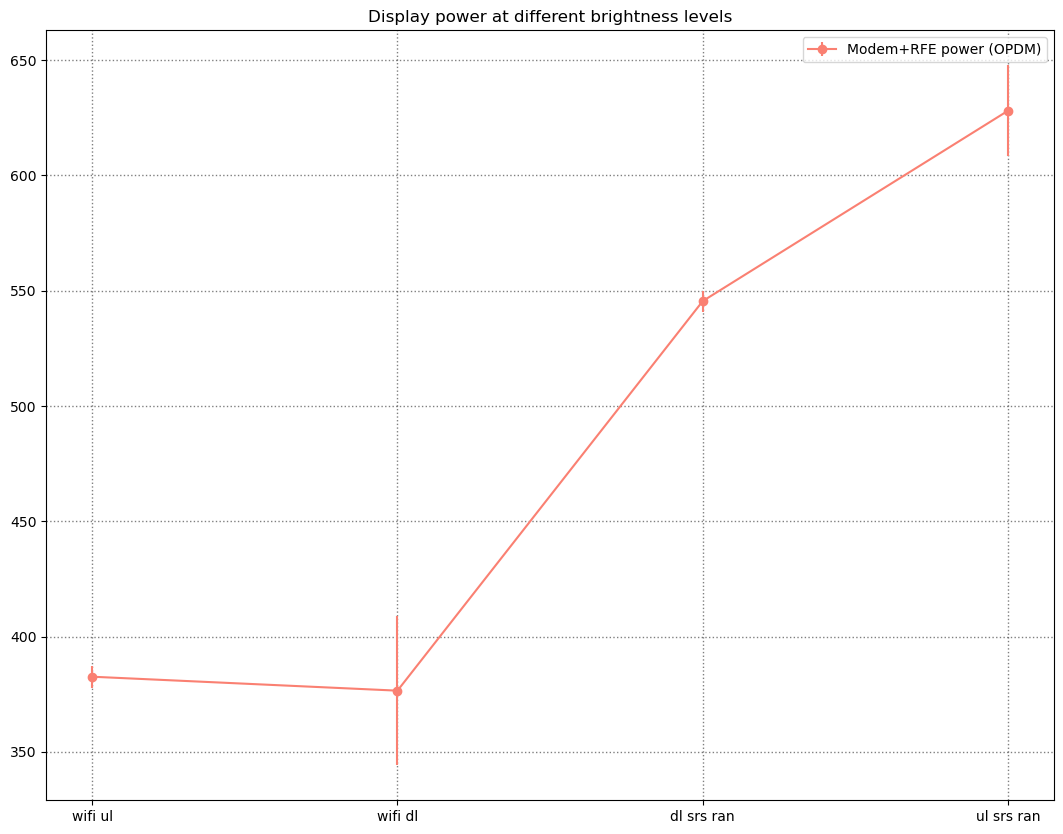

In [55]:
delta_battery_avg = np.mean(np.array(delta_battery).T,1)
battery_avg = np.mean(np.array(battery).T,1)
total_avg = np.mean(np.array(odpm_total).T,1)

modem_avg = np.mean(np.array(modem).T,1)
disp_avg = np.mean(np.array(display).T,1)
# legend_list = ['Standby','Iperf1M','Iperf5M','Iperf10M']
legend_list = ['wifi ul','wifi dl','dl srs ran','ul srs ran']
plt.rcParams['figure.figsize'] = [13, 10]
# plt.errorbar(range(len(legend_list)),total_avg,yerr=np.std(np.array(odpm_total).T,1),color='blue',linestyle='-',marker='o',label = 'Power from Battery counters')
# plt.errorbar(range(len(legend_list)),disp_avg,yerr=np.std(np.array(display).T,1),color='salmon',linestyle='-',marker='>',label='Display power (ODPM)')
plt.errorbar(range(len(legend_list)),modem_avg,yerr=np.std(np.array(modem).T,1),color='salmon',linestyle='-',marker='o',label = 'Modem+RFE power (OPDM)')
# plt.errorbar(range(len(legend_list)),delta_battery_avg,yerr=np.std(np.array(delta_battery).T,1),color='orange',linestyle='-',marker='o',label =  'Battery power difference')
plt.legend()
plt.title('Display power at different brightness levels') 
plt.xticks(range(len(legend_list)),legend_list)
plt.grid(visible=True,which='major',color='k', linestyle=':', linewidth=1, alpha=0.5)
plt.grid(visible=True,which='minor',color='k', linestyle=':', linewidth=1, alpha=0.1)
# plt.ylim([300,800])

In [ ]:
x = np.arange(2)
# [Wifi,srsRAN]
airplane = combined_battery['Airplane Full Brightness']
lte_std = combined_battery['LTE Standby FB']-combined_battery['Airplane Full Brightness']
display = combined_battery['5G stdby FB']-combined_battery['Stdby disp off']
display_5g = combined_battery['5G stdby FB']-combined_battery['Stdby disp off']
std_5g= combined_battery['5G stdby FB']-combined_battery['Airplane Full Brightness']

width = 0.25
plt.bar(x-width/2,airplane,width,color='lightblue',edgecolor='k',label = 'Others') 
plt.bar(x-width/2,display,width,color='blue',edgecolor='k',label ='Display')
plt.bar(x-width/2,lte_std,width,bottom=airplane,color='cyan',label='4g Standby Modem+RFE',edgecolor='k')
# plt.bar(x,lte,width,bottom=airplane,color='cyan',label='Standby',edgecolor='k')

plt.bar(x+width/2,airplane,width,color='lightblue',edgecolor='k',)
plt.bar(x+width/2,display_5g,width,color='blue',edgecolor='k',)

plt.bar(x+width/2,std_5g,width,bottom=airplane,color='lavender',label='5g standby Modem+RFE',edgecolor='k')
plt.legend()
plt.xticks(x,['Pixel','S23'])